In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
from scipy import stats
import numpy as np
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('datosejercicioevaluacionanchuras.xlsx')
df_1 = df[df['Época histórica']==1] # Predinástico temprano
df_2 = df[df['Época histórica']==2] # Predinástico tardío

# Ejercicio 1-a)

En primer lugar, vamos a obtener las diferentes medidas de centralización, dispersión, asimetría y curtosis para la anchura de los cráneos del periodo predinástico temprano.

In [3]:
valores_1 = pd.DataFrame(df_1['Anchura del cráneo'].describe())
valores_1.reset_index(inplace=True)
valores_1.rename(columns={'index':'Medida'},inplace = True)
valores_1

,Medida,Anchura del cráneo
0,count,30.000000
1,mean,131.533333
2,std,0.819307
3,min,130.000000
4,25%,131.000000
5,50%,131.500000
6,75%,132.000000
7,max,134.000000


In [4]:
moda = df_1['Anchura del cráneo'].mode()
moda

0    131
1    132
Name: Anchura del cráneo, dtype: int64

In [5]:
rango = df_1['Anchura del cráneo'].max() - df_1['Anchura del cráneo'].min()
rango

4

In [6]:
varianza = df_1['Anchura del cráneo'].var()
varianza

0.6712643678160921

In [7]:
# Coeficiente de variacion de Pearson = desv. estandar / media
pearson = valores_1.loc[2][1]/valores_1.loc[1][1]
pearson

0.006228894440395486

In [8]:
# Pre-calculo de asimetria y curtosis
df_1['Xi - Media'] = df_1['Anchura del cráneo'] - valores_1.loc[1][1]
df_1['(Xi - Media)*3'] = df_1['Xi - Media']**3
df_1['(Xi - Media)*4'] = df_1['Xi - Media']**4

In [9]:
fischer = df_1['(Xi - Media)*3'].sum()/((df_1['Época histórica'].count()-1)*math.pow(valores_1.loc[2][1],3))
fischer

0.6459405126888941

In [10]:
curtosis = df_1['(Xi - Media)*4'].sum()/((df_1['Época histórica'].count()-1)*math.pow(valores_1.loc[2][1],4)) -3
curtosis

1.1608932257459212

Ahora obtendremos el histograma y el diagrama de caja y bigotes.

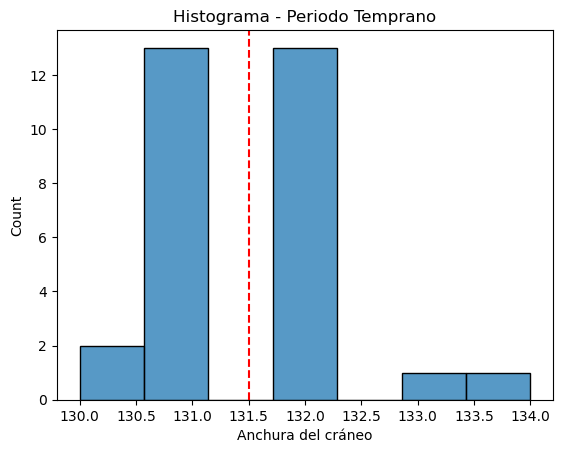

In [11]:
sns.histplot(data=df_1['Anchura del cráneo'])
plt.axvline(x=valores_1.loc[5][1], color='red', linestyle='--')
plt.title('Histograma - Periodo Temprano')
plt.show()

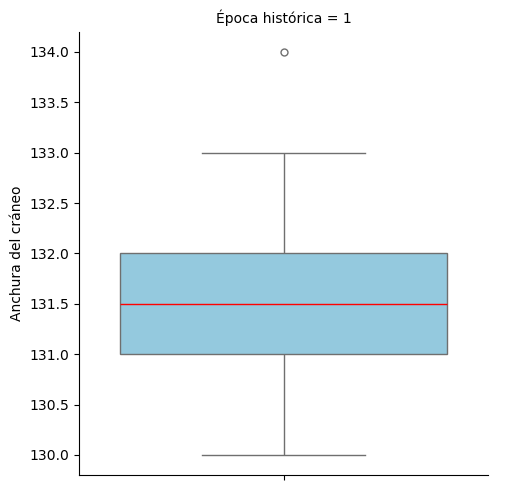

In [12]:
sns.catplot(data=df_1, y='Anchura del cráneo', col='Época histórica', kind='box', color='skyblue', medianprops={'color':'red'} )
plt.show()

Ahora repetimos los procesos anteriores para el periodo predinástico tardío.

In [13]:
valores_2 = pd.DataFrame(df_2['Anchura del cráneo'].describe())
valores_2.reset_index(inplace=True)
valores_2.rename(columns={'index':'Medida'},inplace = True)
valores_2

,Medida,Anchura del cráneo
0,count,30.000000
1,mean,132.466667
2,std,1.008014
3,min,131.000000
4,25%,132.000000
5,50%,133.000000
6,75%,133.000000
7,max,135.000000


In [14]:
moda = df_2['Anchura del cráneo'].mode()
moda

0    133
Name: Anchura del cráneo, dtype: int64

In [15]:
rango = df_2['Anchura del cráneo'].max() - df_2['Anchura del cráneo'].min()
rango

4

In [16]:
varianza = df_2['Anchura del cráneo'].var()
varianza

1.0160919540229887

In [17]:
pearson = valores_2.loc[2][1]/valores_2.loc[1][1]
pearson

0.007609566175043748

In [18]:
df_2['Xi - Media'] = df_2['Anchura del cráneo'] - valores_2.loc[1][1]
df_2['(Xi - Media)*3'] = df_2['Xi - Media']**3
df_2['(Xi - Media)*4'] = df_2['Xi - Media']**4

In [19]:
fischer = df_2['(Xi - Media)*3'].sum()/((df_2['Época histórica'].count()-1)*math.pow(valores_2.loc[2][1],3))
fischer

0.1918262295493577

In [20]:
curtosis = df_2['(Xi - Media)*4'].sum()/((df_2['Época histórica'].count()-1)*math.pow(valores_2.loc[2][1],4)) -3
curtosis

-0.2800290739337874

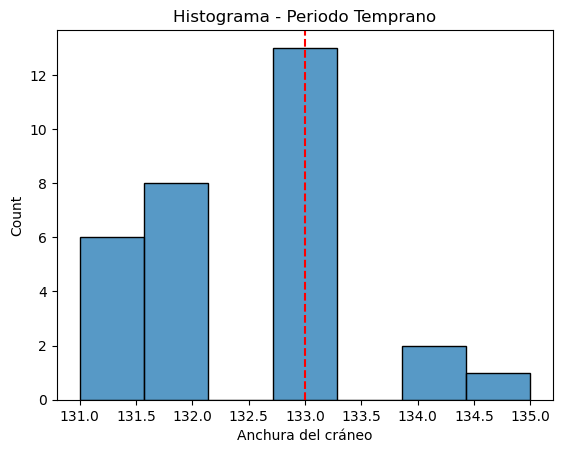

In [21]:
sns.histplot(data=df_2['Anchura del cráneo'])
plt.axvline(x=valores_2.loc[5][1], color='red', linestyle='--')
plt.title('Histograma - Periodo Temprano')
plt.show()

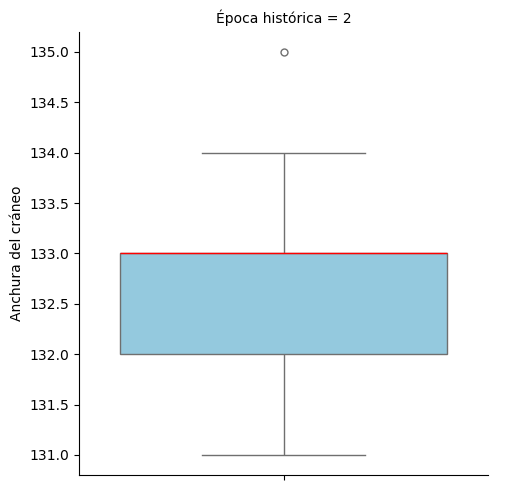

In [22]:
sns.catplot(data=df_2, y='Anchura del cráneo', col='Época histórica', kind='box', color='skyblue', medianprops={'color':'red'} )
plt.show()

#### **Análisis de las muestras**
##### Predinástico temprano

Respecto al periodo predinástico temprano, las medidas de centralización nos indican que la muestra es relativamente simétrica, ya que tenemos una media de 131.53 y una mediana muy similar, de 131.5. Además, tenemos dos modas, es decir, dos valores que son los más frecuentes, que son justamente 131 y 132, los valores alrededor de la media. Esta tesis se refuerza analizando las medidades de la dispersión, con una desviación estándar de 0.82, una varianza de 0.67 y un rango de 4mm, lo cual indica que la variabilidad es pequeña.

Si analizamos la simetría con el coeficiente de variación de Pearson, obtenemos un valor de 0.006, muy próximo a 0, y que compararemos posteriormente con el de la segunda muestra. El coeficiente de asimetría de Fischer es de 0.65 que, si bien es mayor que 0 (lo cual indicaría una distribución ligeramente ladeada a la derecha), es tan cercano a 0 que podríamos considerar que es una distribución simétrica. Por último, el coeficiente de curtosis nos da una idea de como de "achatada" es la distribución. En este caso, un valor de 1.16 nos indica que es leptocúrtica, es decir, que los valores se concentran en torno al eje de simetría.

##### Predinástico tardío
En este caso, tenemos unos resultados similares al anterior caso en lo que a las medidas de centralización se refiere. Con una media de 132.47 y una mediana de 133, coincidente con la moda también, nos indica que la muestra es simétrica. La desviación estándar es ligeramente superior, de 1.01, y similar a la varianza, de 1.02, pero el rango es el mismo, 4mm en ambos casos.

Respecto a la asimetría, tenemos un coeficiente de variación de Pearson de 0.0076, indicando de nuevo una variable simétrica; y un coeficiente de Fischer de 0.19, que nos indica que, si bien la distribución está muy ligeramente ladeada hacia la derecha, es casi simétrica. Por último, el coeficiente de curtosis es en este caso -0.28, es decir, una distribución mesocúrtica, más abierta, donde los valores no se concentran tanto en torno al eje de simetría.

##### Comparación
En ambos casos, se trata de distribuciones muy simétricas, ya que todas las medidas de dispersión son bastante similares entre sí. Se puede observar que tanto la media como la mediana del predinástico tardío son superiores a las del predinástico temprano. Esto nos indica que los cráneos eran en general más anchos en este período. Además, tenemos también una mayor desviación estándar, lo cual nos indica que, aunque el rango es el mismo en ambos casos, hay más variabilidad en las medidas en este período más reciente. 

Por último, tenemos en ambos casos distribuciones simétricas, aunque es cierto que la del predinástico tardío tiende a ser menos concentrada en torno a la media, como es indicado por el coeficiente de curtosis, y por un coeficiente de Pearson ligeramente superior. Aún así, y como se observa también en el histograma y en el diagrama de caja y bigotes, tenemos dos muestras igualmente simétricas, y ambas con unos valores y formas prácticamente iguales.

# Ejercicio 1-b)

A continuación usaremos el test de Kolmogorov-Smirnov para determinar si las muestras siguen una distribución normal.

In [23]:
sm1 = np.array(df_1['Anchura del cráneo'])
sm1 = sm1.reshape(-1, 1)
sm2 = np.array(df_2['Anchura del cráneo'])
sm2 = sm2.reshape(-1, 1)


scaler1 = StandardScaler()
scaler2 = StandardScaler()

# Normalizamos las muestras y las llevamos a una matriz unidimensional
sm1 = scaler1.fit_transform(sm1)
sm1=sm1.flatten()
sm2 = scaler2.fit_transform(sm2)
sm2=sm2.flatten()

# Aplicamos la prueba de Kolmogorov-Smirnov
statistic1, pvalue1 = stats.kstest(sm1, 'norm')
statistic2, pvalue2 = stats.kstest(sm2, 'norm')

# Imprimir los resultados
print("Resultados de la muestra del período predinástico temprano:")
print(f"\tEstadístico: {statistic1}, Valor p: {pvalue1}")

print("\nResultados de la muestra del período predinástico tardío:")
print(f"\tEstadístico: {statistic2}, Valor p: {pvalue2}")

Resultados de la muestra del período predinástico temprano:
	Estadístico: 0.2460415331404474, Valor p: 0.04379464338101191

Resultados de la muestra del período predinástico tardío:
	Estadístico: 0.23809252465886277, Valor p: 0.05572704984817678


Para evaluar si las muestras siguen o no la distribución normal, aplicaremos el test de Kolmogorov-Smirnov. En este caso, tenemos la hipótesis H0, que dice que la muestra en cuestión sigue una distribución normal; y la hipótesis H1, que nos indica que la muestra no sigue dicha distribución. Queremos ver si rechazamos la hipótesis H0 (es decir, los datos no siguen la distribución normal) o si no la rechazamos. Para ello calcularemos el estadísticos, el cual compararemos con el valor en cuestión de la tabla, para determinar si rechazar o no la hipótesis. En nuestro caso, para una muestra de tamaño 30, y a un intervalo de confianza del 95%, el valor del estadístico es de 0.24170: es decir, si el valor que obtengamos es mayor que este, la muestra no sigue una distribución normal, y se rechaza la hipótesis. En caso contrario, se acepta. Alternativa, podría usarse el p-valor, que nos indica si hay suficiente evidencia o no para rechazar la hipótesis: si es menor que 0.05 (considerando nuestro intervalo de confianza al 95%), entonces podemos rechazar la hipótesis nula.

En nuestro caso, analizando el p-valor, vemos que en el caso de la primera muestra tiene un valor de 0.0438. Ya que es menor que 0.05, podemos rechazar la hipótesis nula, concluyendo que los datos de la primera muestra, del predinástico temprano, no siguen una distribución normal.

En el caso de la segunda muestra, el p-valor es de 0.0557, superior a 0.05, por lo que se acepta la hipótesis H0 y se concluye que la muestra del predinástico tardío sigue efectivamente una distribución normal.

# Ejercicio 2-a)

In [24]:
m1 = np.array(df_1['Anchura del cráneo'])
m2 = np.array(df_2['Anchura del cráneo'])

# Calculamos medias y desviaciones estándar
mean1 = np.mean(m1)
mean2 = np.mean(m2)
diffm = mean1 - mean2
std1 = np.std(m1, ddof=1)
std2 = np.std(m2, ddof=1)
n1 = len(sm1)
n2 = len(sm2)

# Grados de libertad para la t de student
gl = min(n1-1, n2-1)

# Definimos los intervalos de confianza
confint = [0.90, 0.95, 0.99]
intervals = {}

for conf in confint:
    alpha = 1-conf
    t_crit = stats.t.ppf(1-alpha/2, gl)

    margen = t_crit*np.sqrt((std1**2/n1)+(std2**2/n2))

    lim_inf = diffm-margen
    lim_sup = diffm+margen
    intervals[conf] = (lim_inf, lim_sup)

for conf, (low, up) in intervals.items():
    print(f"Intervalo de confianza para la diferencia de medias al {conf*100:.0f}%: ({low}, {up})")

Intervalo de confianza para la diferencia de medias al 90%: (-1.3362995352745775, -0.5303671313920968)
Intervalo de confianza para la diferencia de medias al 95%: (-1.4183814834232562, -0.44828518324341815)
Intervalo de confianza para la diferencia de medias al 99%: (-1.5870398198651203, -0.2796268468015539)


Vistos los resultados de los intervalos de confianza, observamos que ninguno incluye al 0, por lo que podemos concluir que la diferencia entre las medias de las anchuras de cráneos es estadísticamente significativa. Además, el hecho de que todos los intervalos sean negativos nos sugiere que la anchura de los cráneos ha ido decreciendo; es decir, que en el predinástico temprano los cráneos eran más anchos que en el predinástico tardío.

En relación con los resultados obtenidos del test de Kolmogorov-Smirnov, en el que vimos que la primera muestra no seguía una distribución normal, mientras que la segunda sí, esto podría influir en los resultados de los intervalos de confianza. Ya que la primera muestra no sigue una distribución normal, los intervalos de confianza podrían no ser tan fiables o precisos, ya que la distribución t de student supone muestras normales. Sin embargo, aunque los datos no sigan perfectamente una distribución normal, tenemos una muestra relativamente grande, y los resultaods de los intervalos de confianza nos indican que la diferencia de medias es significativa.

Esto además coincide con lo observado en las gráficas y las diferentes medidas analizadas en el primer apartado, donde ya vimos que la anchura de los cráneos en el período tardío era menor que en el período temprano: es decir, que los cráneos decrecieron. Esto son datos objetivos, que nos podrían llevar a hacer una reflexión mucho más profunda, también analizando una muestra con un mayor número de observaciones, para contar con unos resultados más sólidos, sobre los diferentes motivos por los que los cráneos parecen haber ido decreciendo en tamaño, y si eso se podría deber a los cambios en las costumbres y condiciones de las personas de aquella época.

# Ejercicio 2-b)

In [25]:
# Comprobamos si las varianzas son o no iguales aplicando el test de Levene
statistic, p_value = stats.levene(sm1, sm2)

print(f"Estadístico de Levene: {statistic}, Valor p: {p_value}")
if p_value < 0.05:
    print("Las varianzas son diferentes.")
else:
    print("Las varianzas son iguales.")

Estadístico de Levene: 0.012638286168024683, Valor p: 0.9108784802616202
Las varianzas son iguales.


In [26]:
# Aplicamos el test t
t_stat, p_value = stats.ttest_ind(sm1, sm2, equal_var=True)
print(f"Estadístico t: {t_stat}, Valor p: {p_value}")

Estadístico t: 1.6276272805968468e-14, Valor p: 0.9999999999999871


Para poder aplicar el test, los dos requisitos a cumplir son que las muestras sean normales (ya hemos visto que no lo son, pero se pide realizar el ejercicio igualmente, asumiendo que son normales) y que las varianzas sean homogéneas. Para comprobar esto, establecemos una hipótesis H0 que nos dice que las varianzas son iguales; mientras que la hipótesis H1 nos dice que son diferentes. Calculamos el p-valor, que nos da 0.91, lo cual, para un nivel de confianza de 95% como hemos establecido, nos indica que la hipótesis es cierta y que, por tanto, las varianzas son iguales y se puede aplicar el test t.

Usamos la funcion ttest_ind de stats para calcular el test t, y obtenemos un valor de 1.627627, y un p-valor de 0.99. Esto nos indica que no hay suficiente evidencia para afirmar que la diferencia entre medias sea significativa. Aún así, cabe destacar que estes resultados pueden no ser correctos o válidos, ya que como comentamos anteriormente, uno de los requisitos que debe cumplirse para aplicar este test es que las muestras sean normales, y en este caso una de ellas no lo es.